In [1]:
# Import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random


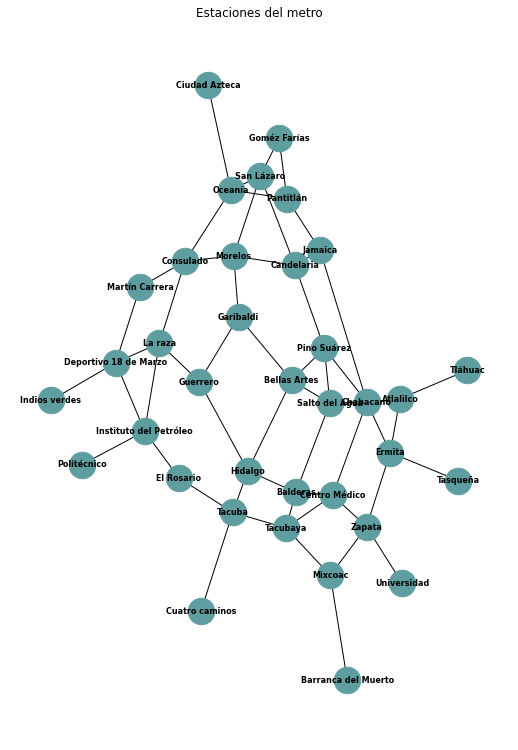

In [2]:
G = nx.Graph()

all_stations = [
    # Línea 1 color rosa
    ('Tacubaya', 'Balderas', {'weight': 6}),
    ('Balderas', 'Salto del Agua', {'weight': 1}),
    ('Salto del Agua', 'Pino Suárez', {'weight': 2}),
    ('Pino Suárez', 'Candelaria', {'weight': 2}),
    ('Candelaria', 'San Lázaro', {'weight': 1}),
    ('San Lázaro', 'Goméz Farías', {'weight': 4}),
    ('Goméz Farías', 'Pantitlán', {'weight': 2}),
    # Línea 2 azul 
    ('Cuatro caminos', 'Tacuba', {'weight': 1}),
    ('Tacuba', 'Hidalgo', {'weight': 7}),
    ('Hidalgo', 'Bellas Artes', {'weight': 1}),
    ('Bellas Artes', 'Pino Suárez', {'weight': 3}),
    ('Pino Suárez', 'Chabacano', {'weight': 2}),
    ('Chabacano', 'Ermita', {'weight': 6}),
    ('Ermita', 'Tasqueña', {'weight': 1}),
    # Línea 3 dorado
    ('Indios verdes', 'Deportivo 18 de Marzo', {'weight': 1}),
    ('Deportivo 18 de Marzo', 'La raza', {'weight': 2}),
    ('La raza', 'Guerrero', {'weight': 2}),
    ('Guerrero', 'Hidalgo', {'weight': 1}),
    ('Hidalgo', 'Balderas', {'weight': 2}),
    ('Balderas', 'Centro Médico', {'weight': 3}),
    ('Centro Médico', 'Zapata', {'weight': 4}),
    ('Zapata', 'Universidad', {'weight': 2}),
    # Línea  4 azul turquesa 
    ('Martín Carrera', 'Consulado', {'weight': 3}),
    ('Consulado', 'Morelos', {'weight': 2}),
    ('Morelos', 'Candelaria', {'weight': 1}),
    ('Candelaria', 'Jamaica', {'weight': 2}),
    # Línea 5 amarilla 
    ('Politécnico', 'Instituto del Petróleo', {'weight': 1}),
    ('Instituto del Petróleo', 'La raza', {'weight': 2}),
    ('La raza', 'Consulado', {'weight': 3}),
    ('Consulado', 'Oceanía', {'weight': 3}),
    ('Oceanía', 'Pantitlán', {'weight': 3}),
    # Línea 6 roja 
    ('El Rosario', 'Instituto del Petróleo', {'weight': 6}),
    ('Instituto del Petróleo', 'Deportivo 18 de Marzo', {'weight': 2}),
    ('Deportivo 18 de Marzo', 'Martín Carrera', {'weight': 2}),
    # Línea 7 naranja 
    ('Barranca del Muerto', 'Mixcoac', {'weight': 1}),
    ('Mixcoac', 'Tacubaya', {'weight': 3}),
    ('Tacubaya', 'Tacuba', {'weight': 5}),
    ('Tacuba', 'El Rosario', {'weight': 4}),
    # Línea 8 verde 
    ('Garibaldi', 'Bellas Artes', {'weight': 1}),
    ('Bellas Artes', 'Salto del Agua', {'weight': 2}),
    ('Salto del Agua', 'Chabacano', {'weight': 3}),
    ('Chabacano', 'Atlalilco', {'weight': 8}),
    # Línea 9 color café 
    ('Tacubaya', 'Centro Médico', {'weight': 3}),
    ('Centro Médico', 'Chabacano', {'weight': 2}),
    ('Chabacano', 'Jamaica', {'weight': 1}),
    ('Jamaica', 'Pantitlán', {'weight': 5}),
    # Línea 12 color café/dorado
    ('Mixcoac', 'Zapata', {'weight': 3}),
    ('Zapata', 'Ermita', {'weight': 3}),
    ('Ermita', 'Atlalilco', {'weight': 2}),
    ('Atlalilco', 'Tláhuac', {'weight': 1}),
    # Línea B color verde/gris
    ('Guerrero', 'Garibaldi', {'weight': 1}),
    ('Garibaldi', 'Morelos', {'weight': 3}),
    ('Morelos', 'San Lázaro', {'weight': 1}),
    ('San Lázaro', 'Oceanía', {'weight': 3}),
    ('Oceanía', 'Ciudad Azteca', {'weight': 1})
]

G.add_edges_from(all_stations)

plt.figure(figsize=(7, 10))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, font_size=8, node_color='cadetblue')  
plt.title('Estaciones del metro')
plt.show()

In [18]:
# Algoritmo genético para resolver TSP
class TravelingSalesmanGA:
    def __init__(self, graph, start, end, population_size=100, generations=100, mutation_rate=0.01):
        self.graph = graph
        self.start = start
        self.end = end
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.population = self.init_population()

    def init_population(self):
        population = []
        nodes = list(self.graph.nodes())
        nodes.remove(self.start)
        nodes.remove(self.end)
        for _ in range(self.population_size):
            path = nodes[:]
            random.shuffle(path)
            path = [self.start] + path + [self.end]
            # Asegurarse de que cada conexión exista antes de añadir la ruta
            if all((self.graph.has_edge(path[i], path[i + 1]) for i in range(len(path) - 1))):
                population.append(path)
            else:
                # Generar una ruta alternativa si la aleatoria no es válida
                path = list(nx.shortest_path(self.graph, self.start, self.end))  # Usar un camino más seguro
                population.append(path)
        return population

    def fitness(self, path):
        total_weight = 0
        try:
            total_weight = sum(self.graph[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))
        except KeyError as e:
            #print(f"Error de conexión no definida entre {e.args[0][0]} y {e.args[0][1]}")
            return 0  # Retorna 0 para que este camino tenga el peor fitness posible
        return 1 / total_weight if total_weight > 0 else 0  # Evita división por cero
    
    
    def select(self):
        fitness_scores = [self.fitness(path) for path in self.population]
        total_fitness = sum(fitness_scores)
        if total_fitness == 0:
            print("Todas las rutas tienen un fitness de 0, regenerando la población...")
            self.population = self.init_population()  # Reinicializar la población o manejar de otro modo
            fitness_scores = [self.fitness(path) for path in self.population]
            total_fitness = sum(fitness_scores)
        if total_fitness > 0:
            probabilities = [fitness / total_fitness for fitness in fitness_scores]
            chosen_indices = np.random.choice(len(self.population), self.population_size, replace=True, p=probabilities)
            return [self.population[i] for i in chosen_indices]
        else:
            return self.population  # Devolver la población sin cambios si sigue sin haber rutas válidas

    def crossover(self, parent1, parent2):
        # Cruce entre dos padres para crear un nuevo camino
        cut = random.randint(1, len(parent1) - 2)
        new_path = parent1[:cut] + [node for node in parent2 if node not in parent1[:cut]]
        return new_path

    def mutate(self, path):
        # Mutación del camino con una probabilidad dada
        if random.random() < self.mutation_rate:
            idx1, idx2 = random.sample(range(1, len(path) - 1), 2)  # No mutar el inicio ni el final
            path[idx1], path[idx2] = path[idx2], path[idx1]
        return path

    
    def evolve(self):
        # Evoluciona la población a través de las generaciones
        for _ in range(self.generations):
            new_population = self.select()
            new_population = [self.mutate(self.crossover(new_population[i], new_population[(i + 1) % len(new_population)]))
                              for i in range(0, len(new_population))]
            self.population = new_population
            # Imprimir la mejor ruta encontrada en la última generación
            if _ == self.generations - 1:
                best_route = min(self.population, key=self.fitness)
                print("Mejor ruta encontrada:", best_route)
                fitness_value = self.fitness(best_route)
                if fitness_value > 0:  # Verificar si el fitness es mayor que cero
                    total_time = 1 / fitness_value
                    print("Tiempo total:", total_time)
                else:
                    print("Tiempo total: No es la mejor ruta")



# Ejecutar el algoritmo
tsp = TravelingSalesmanGA(G, 'El Rosario', 'San Lázaro', population_size=50, generations=200, mutation_rate=0.02)
tsp.evolve()

Mejor ruta encontrada: ['El Rosario', 'Instituto del Petróleo', 'Morelos', 'Consulado', 'La raza', 'San Lázaro']
Tiempo total: No es la mejor ruta


In [20]:
# Algoritmo genético para resolver TSP
class TravelingSalesmanGA:
    def __init__(self, graph, start, end, population_size=100, generations=100, mutation_rate=0.01):
        self.graph = graph
        self.start = start
        self.end = end
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.population = self.init_population()

    def init_population(self):
        population = []
        nodes = list(self.graph.nodes())
        nodes.remove(self.start)
        nodes.remove(self.end)
        for _ in range(self.population_size):
            path = nodes[:]
            random.shuffle(path)
            path = [self.start] + path + [self.end]
            # Asegurarse de que cada conexión exista antes de añadir la ruta
            if all((self.graph.has_edge(path[i], path[i + 1]) for i in range(len(path) - 1))):
                population.append(path)
            else:
                # Generar una ruta alternativa si la aleatoria no es válida
                path = list(nx.shortest_path(self.graph, self.start, self.end))  # Usar un camino más seguro
                population.append(path)
        return population

    def fitness(self, path):
        total_weight = 0
        try:
            total_weight = sum(self.graph[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))
        except KeyError as e:
            #print(f"Error de conexión no definida entre {e.args[0][0]} y {e.args[0][1]}")
            return 0  # Retorna 0 para que este camino tenga el peor fitness posible
        return 1 / total_weight if total_weight > 0 else 0  # Evita división por cero
    
    
    def select(self):
        fitness_scores = [self.fitness(path) for path in self.population]
        total_fitness = sum(fitness_scores)
        if total_fitness == 0:
            print("Todas las rutas tienen un fitness de 0, regenerando la población...")
            self.population = self.init_population()  # Reinicializar la población o manejar de otro modo
            fitness_scores = [self.fitness(path) for path in self.population]
            total_fitness = sum(fitness_scores)
        if total_fitness > 0:
            probabilities = [fitness / total_fitness for fitness in fitness_scores]
            chosen_indices = np.random.choice(len(self.population), self.population_size, replace=True, p=probabilities)
            return [self.population[i] for i in chosen_indices]
        else:
            return self.population  # Devolver la población sin cambios si sigue sin haber rutas válidas

    def crossover(self, parent1, parent2):
        # Cruce entre dos padres para crear un nuevo camino
        cut = random.randint(1, len(parent1) - 2)
        new_path = parent1[:cut] + [node for node in parent2 if node not in parent1[:cut]]
        return new_path

    def mutate(self, path):
        # Mutación del camino con una probabilidad dada
        if random.random() < self.mutation_rate:
            idx1, idx2 = random.sample(range(1, len(path) - 1), 2)  # No mutar el inicio ni el final
            path[idx1], path[idx2] = path[idx2], path[idx1]
        return path

    
    # Dentro de tu clase TravelingSalesmanGA

    def evolve(self):
        best_fitness_over_time = []
        for generation in range(self.generations):
            new_population = self.select()
            new_population = [self.mutate(self.crossover(new_population[i], new_population[(i + 1) % len(new_population)]))
                              for i in range(0, len(new_population))]
            self.population = new_population
            # Evaluar la mejor ruta en la generación actual
            current_best_route = min(self.population, key=self.fitness)
            current_best_fitness = self.fitness(current_best_route)
            best_fitness_over_time.append(current_best_fitness)
            # Imprimir la mejor ruta y el fitness de la generación actual
            print(f"Generación {generation + 1}: Mejor fitness: {current_best_fitness:.3f}, "
                  f"Longitud de ruta: {1/current_best_fitness if current_best_fitness > 0 else 'Infinito'}, "
                  f"Mejor ruta: {current_best_route}")
        
        # Al final de todas las generaciones, imprimir la mejor ruta global
        best_route = min(self.population, key=self.fitness)
        best_route_fitness = self.fitness(best_route)
        print(f"Mejor ruta global encontrada: {best_route}")
        print(f"Fitness de la mejor ruta global: {best_route_fitness:.3f}")
        print(f"Tiempo total de la mejor ruta: {1/best_route_fitness if best_route_fitness > 0 else 'Infinito'}")



# Ejecutar el algoritmo
tsp = TravelingSalesmanGA(G, 'El Rosario', 'San Lázaro', population_size=50, generations=200, mutation_rate=0.02)
tsp.evolve()

Generación 1: Mejor fitness: 0.071, Longitud de ruta: 14.0, Mejor ruta: ['El Rosario', 'Instituto del Petróleo', 'La raza', 'Consulado', 'Morelos', 'San Lázaro']
Generación 2: Mejor fitness: 0.071, Longitud de ruta: 14.0, Mejor ruta: ['El Rosario', 'Instituto del Petróleo', 'La raza', 'Consulado', 'Morelos', 'San Lázaro']
Generación 3: Mejor fitness: 0.000, Longitud de ruta: Infinito, Mejor ruta: ['El Rosario', 'Instituto del Petróleo', 'Morelos', 'Consulado', 'La raza', 'San Lázaro']
Generación 4: Mejor fitness: 0.000, Longitud de ruta: Infinito, Mejor ruta: ['El Rosario', 'Morelos', 'La raza', 'Consulado', 'Instituto del Petróleo', 'San Lázaro']
Generación 5: Mejor fitness: 0.000, Longitud de ruta: Infinito, Mejor ruta: ['El Rosario', 'Instituto del Petróleo', 'Morelos', 'Consulado', 'La raza', 'San Lázaro']
Generación 6: Mejor fitness: 0.071, Longitud de ruta: 14.0, Mejor ruta: ['El Rosario', 'Instituto del Petróleo', 'La raza', 'Consulado', 'Morelos', 'San Lázaro']
Generación 7: Me